In [1]:
import os
import numpy as np
import pandas as pd

### Dataset from Kaggle regarding heart failure prediction

http://localhost:8888/notebooks/OneDrive/Documents/Super%20important%20documents/IBM%20Machine%20Learning%20Course/Exploratory%20Data%20Analysis/Peer%20Review%20Project/Untitled.ipynb?kernel_name=python3

#### Context 

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

#### Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female] 

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] 

RestingBP: resting blood pressure [mm Hg] 

Cholesterol: serum cholesterol [mm/dl] 

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] 

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST  elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] 

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] 

ExerciseAngina: exercise-induced angina [Y: Yes, N: No] 

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]\

In [93]:
df = pd.read_csv('heart.csv')

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review.Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

Sections required in your report:

Brief description of the data set and a summary of its attributes

Initial plan for data exploration

Actions taken for data cleaning and feature engineering

Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

Formulating at least 3 hypothesis about this data

Conducting a formal significance test for one of the hypotheses and discuss the results 

Suggestions for next steps in analyzing this data

A paragraph that summarizes the quality of this data set and a request for additional data if needed

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
len(data['Sex'].unique())

2

In [6]:
for column in data.columns:
    print(f'{column} has {data[column].nunique()} unique values.')

Age has 50 unique values.
Sex has 2 unique values.
ChestPainType has 4 unique values.
RestingBP has 67 unique values.
Cholesterol has 222 unique values.
FastingBS has 2 unique values.
RestingECG has 3 unique values.
MaxHR has 119 unique values.
ExerciseAngina has 2 unique values.
Oldpeak has 53 unique values.
ST_Slope has 3 unique values.
HeartDisease has 2 unique values.


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
import seaborn as sns
sns.set()

<AxesSubplot:>

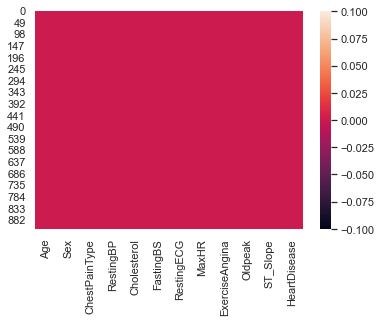

In [10]:
sns.heatmap(data.isnull())

In [127]:
df['Is_Cholesterol > 0'] = np.where(df['Cholesterol'] > 0, 'Yes', 'No')

<AxesSubplot:xlabel='Is_Cholesterol > 0', ylabel='count'>

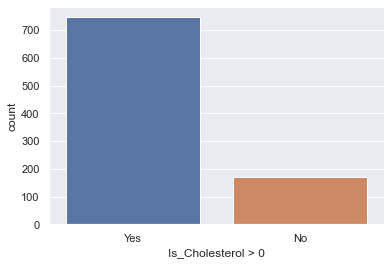

In [129]:
sns.set()
sns.countplot(x='Is_Cholesterol > 0', data=df)

In [126]:
df['Cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
categ_col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [14]:
for columns in categ_col:
    print(f'The unique values in {columns} are {data[columns].unique()}')

The unique values in Sex are ['M' 'F']
The unique values in ChestPainType are ['ATA' 'NAP' 'ASY' 'TA']
The unique values in RestingECG are ['Normal' 'ST' 'LVH']
The unique values in ExerciseAngina are ['N' 'Y']
The unique values in ST_Slope are ['Up' 'Flat' 'Down']


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Correlation Heatmap')

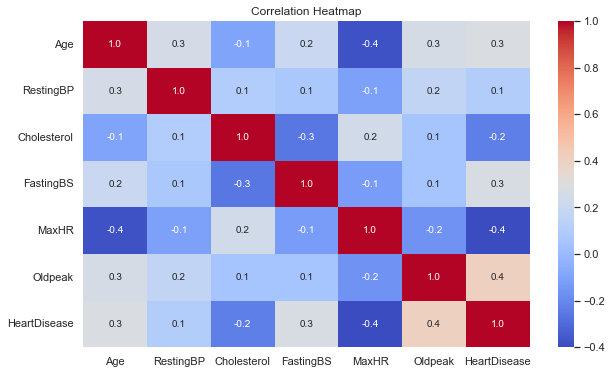

In [16]:
corr = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Heatmap')

In [17]:
data[['HeartDisease']]

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [115]:
pairplot_columns = numeric_cols.copy()
pairplot_columns.append('HeartDisease')

In [116]:
numeric_cols

['Age', 'RestingBP', 'MaxHR', 'Oldpeak']

In [117]:
data_1_num = data[pairplot_columns]

In [118]:
data_1_num.head()

,Age,RestingBP,MaxHR,Oldpeak,HeartDisease
0,40,140,172,0.0,0
1,49,160,156,1.0,1
2,37,130,98,0.0,0
3,48,138,108,1.5,1
4,54,150,122,0.0,0


In [119]:
data[numeric_cols]

,Age,RestingBP,MaxHR,Oldpeak
0,40,140,172,0.0
1,49,160,156,1.0
2,37,130,98,0.0
3,48,138,108,1.5
4,54,150,122,0.0
...,...,...,...,...
913,45,110,132,1.2
914,68,144,141,3.4
915,57,130,115,1.2
916,57,130,174,0.0


In [120]:
data_1_num

,Age,RestingBP,MaxHR,Oldpeak,HeartDisease
0,40,140,172,0.0,0
1,49,160,156,1.0,1
2,37,130,98,0.0,0
3,48,138,108,1.5,1
4,54,150,122,0.0,0
...,...,...,...,...,...
913,45,110,132,1.2,1
914,68,144,141,3.4,1
915,57,130,115,1.2,1
916,57,130,174,0.0,1


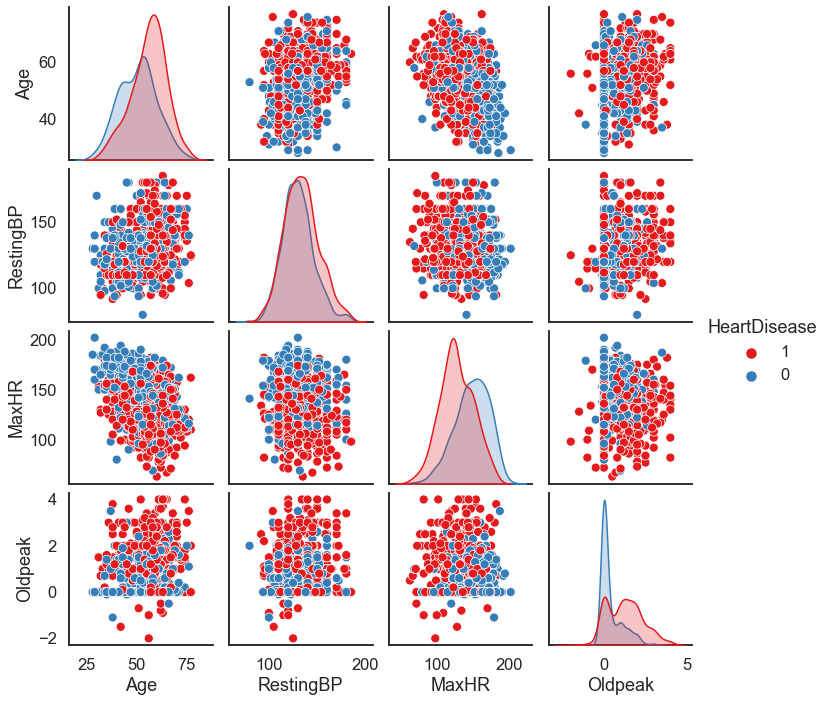

In [121]:
sns.set_context('talk')
sns.set_style('white')
sns.pairplot(data_1_num, hue='HeartDisease', hue_order=[1, 0], palette='Set1')

In [23]:
data['Cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [24]:
# High number of zeros

In [25]:
data.loc[(data['Cholesterol'] == 0) & (data['HeartDisease'] == 1), 'Cholesterol'].count()

152

152 people have heart disease and where Cholesterol is 0 - this does not add value since no one has cholesterol zero and hence, these values should be removed which shows that if the null values are dropped, a lot of the rows will need to be removed and therefore, it is best to drop the Cholesterol column


In [26]:
data.drop('Cholesterol', axis=1, inplace=True)
numeric_cols.remove('Cholesterol')

In [27]:
numeric_cols

['Age', 'RestingBP', 'FastingBS', 'MaxHR', 'Oldpeak']

In [28]:
 for val in range(0, 4):
        print(val)

0
1
2
3


<AxesSubplot:>

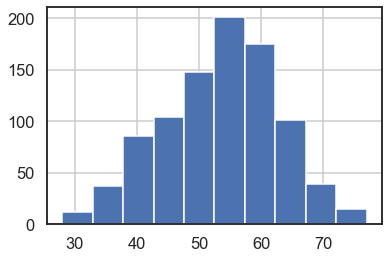

In [29]:
data['Age'].hist()

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

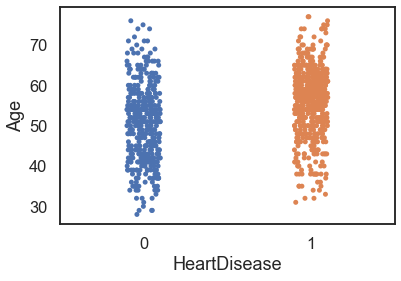

In [30]:
sns.stripplot(x='HeartDisease', y='Age', data=data)

(<Figure size 432x288 with 20 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
       dtype=object))

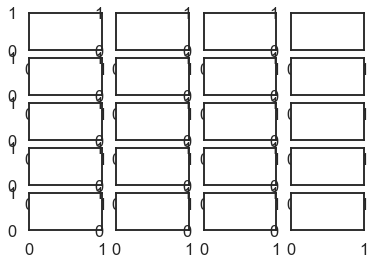

In [31]:
plt.subplots(5, 4)

<AxesSubplot:xlabel='HeartDisease', ylabel='HeartDisease'>

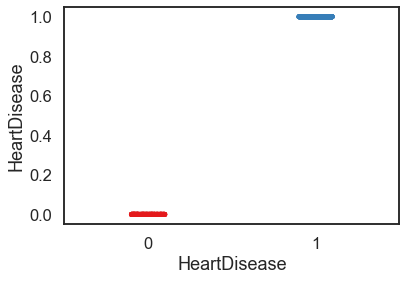

In [32]:
sns.stripplot(x='HeartDisease', y=column, data=data, palette='Set1')

In [33]:
numeric_cols

['Age', 'RestingBP', 'FastingBS', 'MaxHR', 'Oldpeak']

In [34]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,0,Normal,173,N,0.0,Up,0


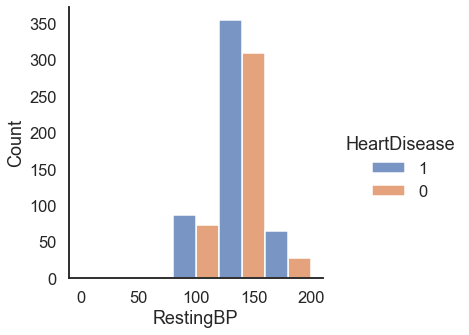

In [35]:
sns.displot(x='RestingBP', hue='HeartDisease', bins=5,hue_order=[1, 0], data=data, multiple='dodge')

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

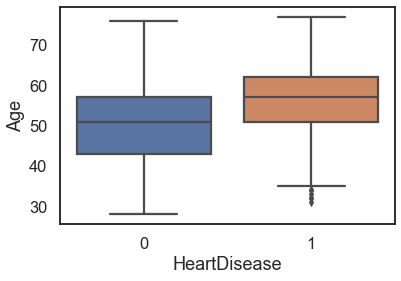

In [36]:
sns.boxplot(x='HeartDisease', y='Age', data=data)

In [37]:
numeric_cols.remove('FastingBS')

In [90]:
data

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,0,LVH,174,N,0.0,Flat,1


<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

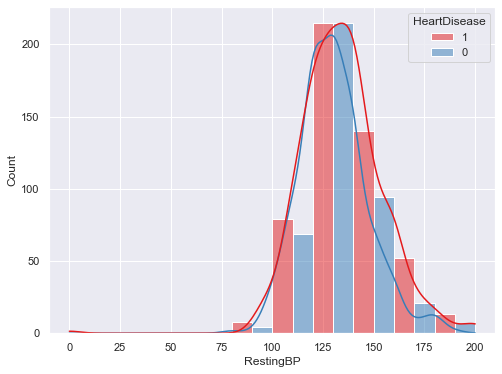

In [138]:
plt.figure(figsize=(8,6))
sns.histplot(x='RestingBP', hue='HeartDisease', bins=10,hue_order=[1, 0], data=df, palette='Set1',
kde=True, multiple='dodge')

In [ ]:
sns.histplot(ax=axes[index][1], x=column, hue='HeartDisease', bins=10,hue_order=[1, 0], data=df, palette='Set1')


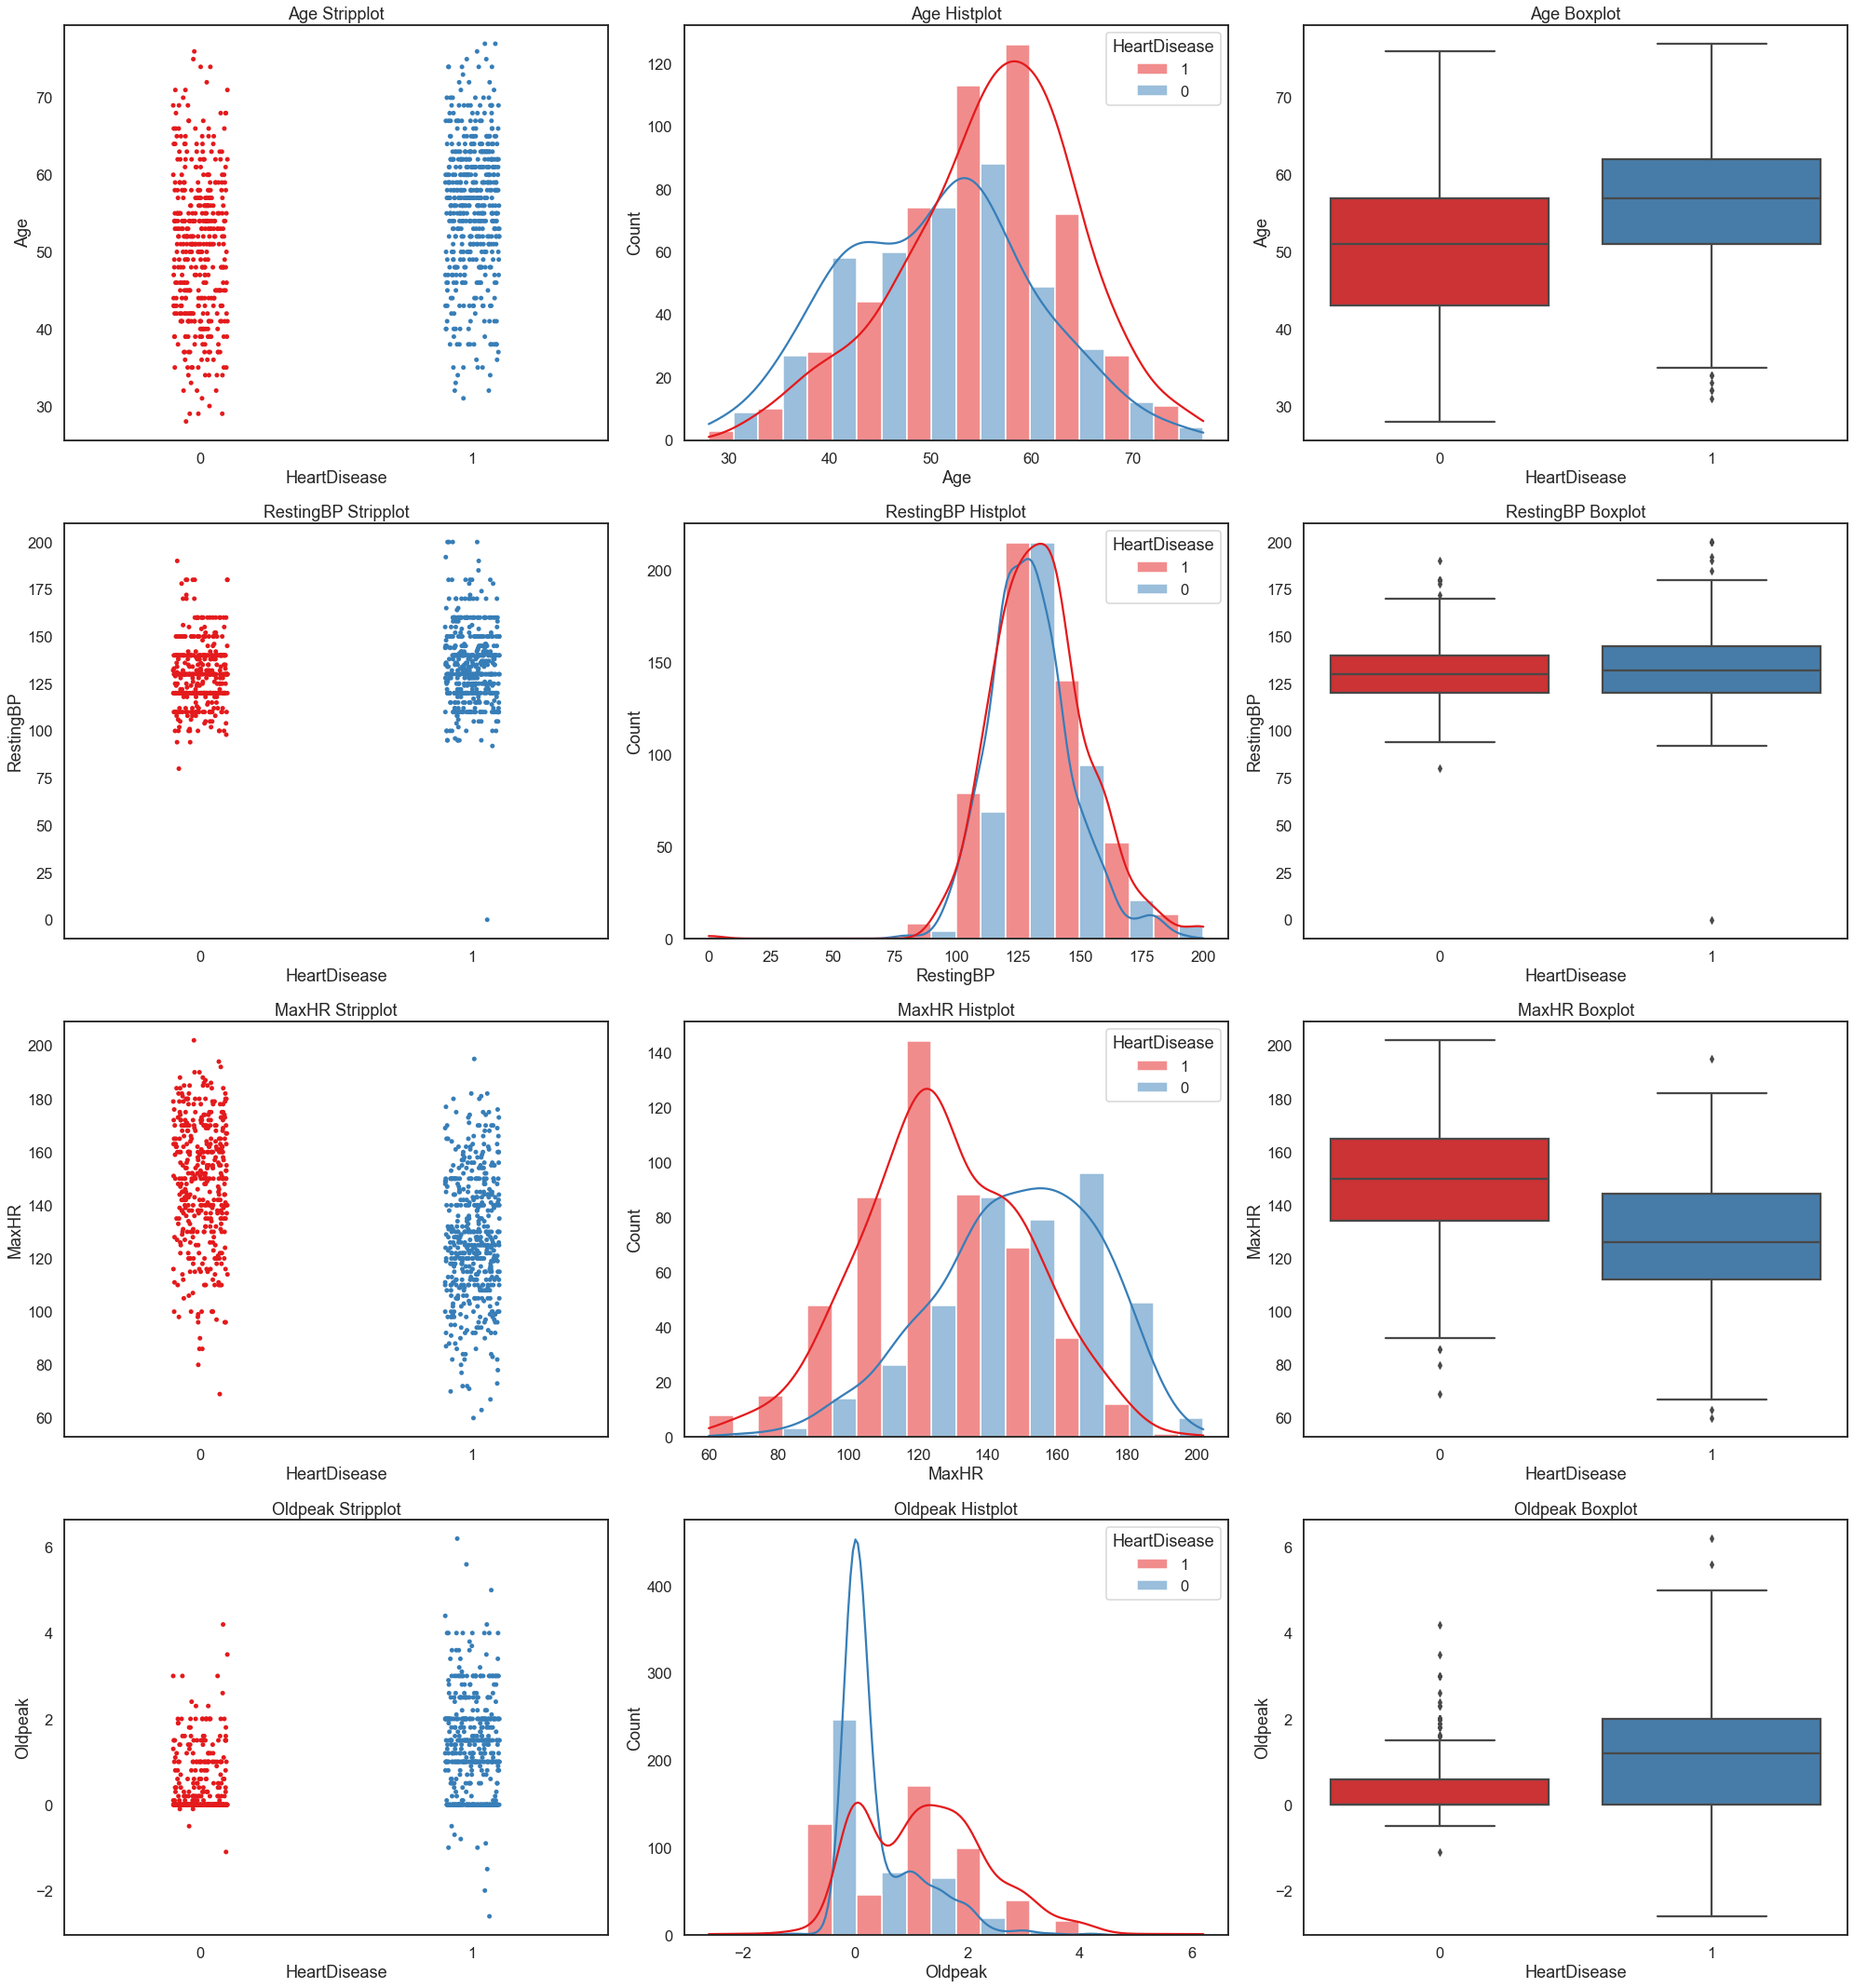

In [96]:
# For numerical columns - will plot different graphs of variables against target that check for outliers etc

fig, axes = plt.subplots(4, 3, figsize=(28, 30))
for index, column in zip(range(4), numeric_cols):
    
    # Strip plot
    sns.stripplot(ax=axes[index][0], x='HeartDisease', y=column, data=df, palette='Set1', hue_order=[1, 0])
    axes[index][0].set_title(f'{column} Stripplot')
    
    sns.histplot(ax=axes[index][1], x=column, hue='HeartDisease', bins=10,hue_order=[1, 0], data=df, palette='Set1',
    kde=True, multiple='dodge')
    axes[index][1].set_title(f'{column} Histplot')
    
    sns.boxplot(ax=axes[index][2], x='HeartDisease', y=column, data=df, palette='Set1', hue_order=[1, 0])
    axes[index][2].set_title(f'{column} Boxplot')
    plt.tight_layout()

Categorical Columns

In [65]:
data._get_numeric_data()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,0,172,0.0,0
1,49,160,0,156,1.0,1
2,37,130,0,98,0.0,0
3,48,138,0,108,1.5,1
4,54,150,0,122,0.0,0
...,...,...,...,...,...,...
913,45,110,0,132,1.2,1
914,68,144,1,141,3.4,1
915,57,130,0,115,1.2,1
916,57,130,0,174,0.0,1


In [67]:
from scipy import stats

In [68]:
# Removing all outliers from the data
# Most of the code is copied from Sharma (2018) 
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
# The first step is to find the z-score (number of standard deviations above or below the mean), take the absolute value
# and wherever the values of z are less than 3 standard deviations, only keep these in the dataframe
# The precaution taken is getting only the numeric data where the coding information is taken from Overmeire (2012)
# https://stackoverflow.com/questions/12725417/drop-non-numeric-columns-from-a-pandas-dataframe

z = np.abs(stats.zscore(data._get_numeric_data()))
data = data[(z < 3).all(axis=1)]

In [69]:
data

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,0,LVH,174,N,0.0,Flat,1


Text(0, 0.5, 'Count')

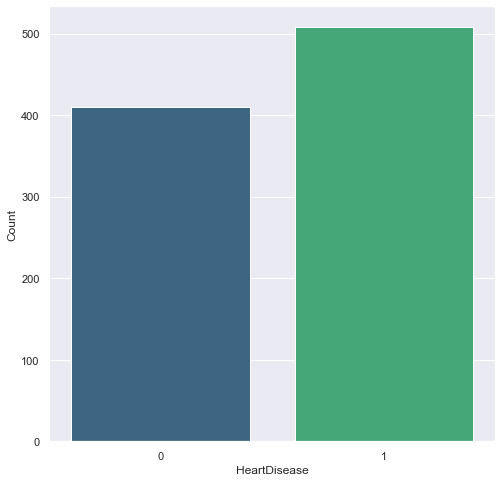

In [106]:
plt.figure(figsize=(8,8))
sns.set()
sns.countplot(data=df, x=df['HeartDisease'], palette='viridis')
plt.ylabel('Count')

In [103]:
categ_col

['Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'FastingBS',
 'FastingBS']

(<Figure size 432x288 with 6 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

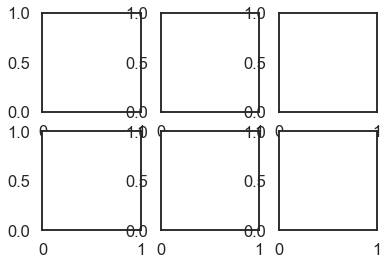

In [71]:
plt.subplots(2,3)

<AxesSubplot:xlabel='Sex', ylabel='count'>

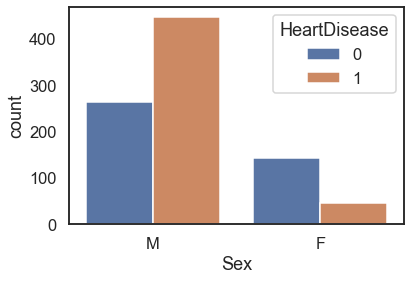

In [72]:
sns.countplot(x='Sex', hue='HeartDisease', data=data)

In [73]:
0//3

0

In [74]:
categ_col.append('FastingBS')

In [4]:
# For numerical columns - will plot different graphs of variables against target that check for outliers etc

fig, axes = plt.subplots(3, 2, figsize=(20,13))
for index, column in zip(range(6), categ_col):
    axes = axes.flatten()
    axes[-1].axis('off')
    # Count plot
    sns.countplot(ax=axes[index % 3][index // 3], x=column, data=data, palette='Set1', hue='HeartDisease', hue_order=[1, 0])
    axes[index % 3][index // 3].set_title(f'{column} Countplot')

    plt.tight_layout()

NameError: name 'plt' is not defined

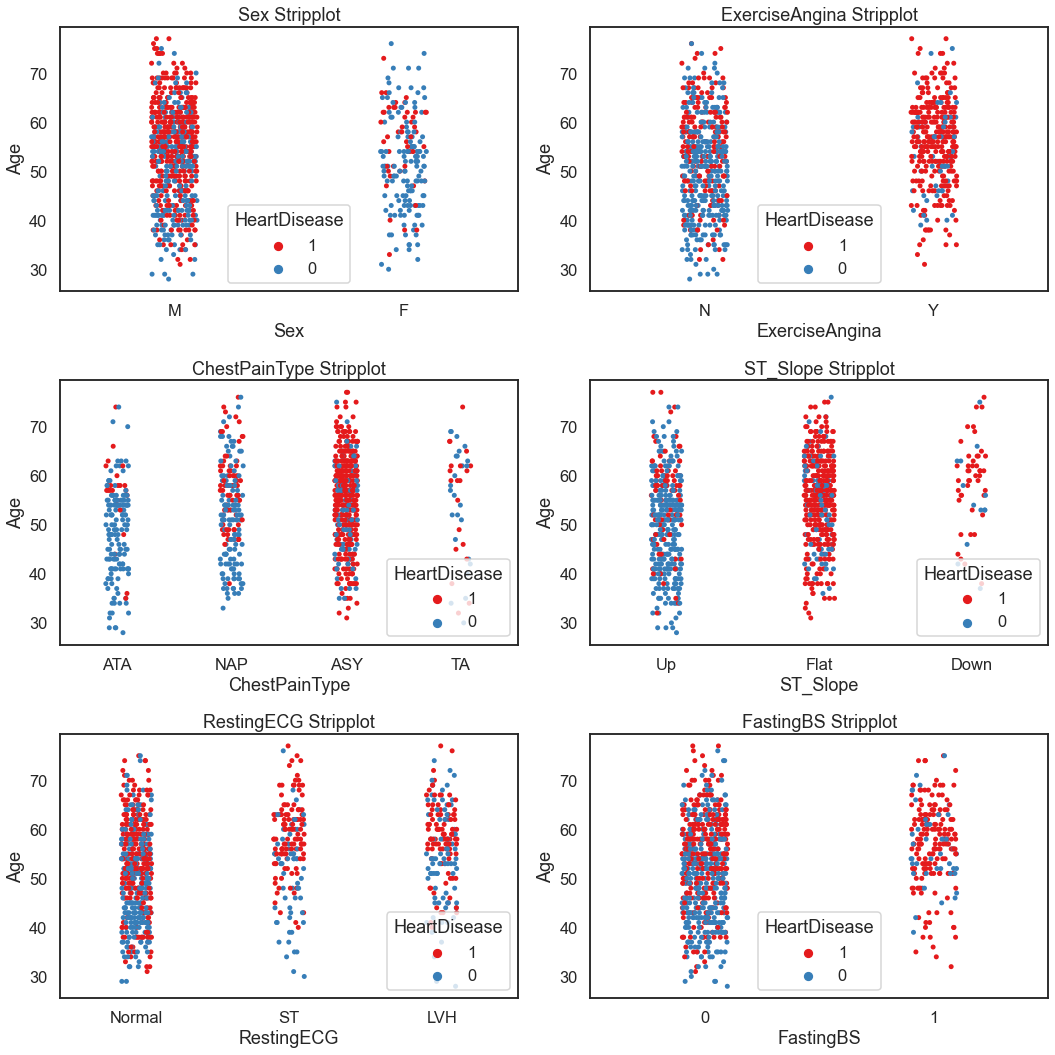

In [76]:
# For numerical columns - will plot different graphs of variables against target that check for outliers etc

fig, axes = plt.subplots(3, 2, figsize=(15,15))
for index, column in zip(range(6), categ_col):
    
    # Count plot
    sns.stripplot(ax=axes[index % 3][index // 3], x=column, y='Age', data=data, palette='Set1', hue='HeartDisease', hue_order=[1, 0])
    sns.move_legend(obj=axes[index % 3][index // 3], loc='best')
    axes[index % 3][index // 3].set_title(f'{column} Stripplot')

    plt.tight_layout()

In [77]:
data['FastingBS'].value_counts()

0    692
1    210
Name: FastingBS, dtype: int64

If a male patient has chest pain type asymptomatic, exercise Angina, and a flat slope for peak exercise, I claim that the person always has a heart disease 
Null Hypothesis: The person may or may not have the heart disease 
Alternative Hypothesis: This person always has a heart disease
Significance Level: 5%

In [78]:
data.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0


In [79]:
hp_1 = data[['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope', 'HeartDisease', 'Oldpeak']]

In [80]:
h = hp_1[(hp_1['ChestPainType'] == 'ASY') & (hp_1['ExerciseAngina'] == 'Y') & (hp_1['Sex'] == 'M')]

In [81]:
h.head()

,Sex,ChestPainType,ExerciseAngina,ST_Slope,HeartDisease,Oldpeak
8,M,ASY,Y,Flat,1,1.5
13,M,ASY,Y,Flat,1,1.0
26,M,ASY,Y,Flat,0,3.0
36,M,ASY,Y,Flat,1,1.5
44,M,ASY,Y,Flat,1,1.0


In [82]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 8 to 915
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             259 non-null    object 
 1   ChestPainType   259 non-null    object 
 2   ExerciseAngina  259 non-null    object 
 3   ST_Slope        259 non-null    object 
 4   HeartDisease    259 non-null    int64  
 5   Oldpeak         259 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 14.2+ KB


In [83]:
h['HeartDisease'].sum()

239

In [84]:
244/264

0.9242424242424242

In [85]:
80/83

0.963855421686747

In [86]:
181/190

0.9526315789473684

In [87]:
# less than 5% cannot reject the null hypothesis

A female patient below the age of 30 with a maximum heart rate of below 120 and cholesterol of 70 never has a heart disease

In [139]:
p_2.info()

NameError: name 'p_2' is not defined

In [144]:
p2 = df[(df['MaxHR'] > 140) & (df['Cholesterol'] < 300)]

In [141]:
p2.info()

NameError: name 'p2' is not defined

In [145]:
p2['HeartDisease'].sum() / len(p2)

0.37183098591549296